# Strategy 2_segmentation


In [1]:
# Import cell, on the "normal" EMC PC's this takes 1-2 minutes
from stardist.models import StarDist2D
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
from matplotlib import image

import numpy as np
import matplotlib.pyplot as plt
import time
import cv2
import os
import glob
import tensorflow as tf
from tensorflow.python.client import device_lib

# Test if GPU is available the code below is 2 ways to check if the CPU is available if the list is empty or the other line prints False your GPU is not available
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

#tf.test.is_gpu_available(cuda_only=True, min_cuda_compute_capability=(7,0))
tf.config.list_physical_devices('GPU')

# run this command if ImportError: DLL load failed: The specified module could not be found. for opencv
# pip install opencv-contrib-python

[]

In [2]:
from stardist.models import StarDist2D 
# prints a list of available models 
StarDist2D.from_pretrained() 
# creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


## General

Here you put in the variables that need to change for each use

In [ ]:
# The path to the folder with each snapshot that you want to segment and get random coordinates, example below this line
# path =r'\\store\department\gene\chien_data\Lab\Data_and_Analysis\Wilco van Nes\Code_testing\Test_snapshots'
path =r'\\store\department\gene\chien_data\Lab\Data_and_Analysis\Wilco van Nes\Code_testing\Test_snapshots'

#location to the path where the images are saved
# path1 = path + '\\460nm';
path2 = path + '\\637nm';
# path3 = path + '\\460nm_segm_img_cellpose_d50';
path4 = path + '\\637nm_segm_img_stardist';
path5 = path + '\\637nm_segm_img_stardist_csv';

# if not os.path.isdir(path1):
#     print("Where is the blue 460nm channel?")
if not os.path.isdir(path2):
    print("Where is the red 637nm channel?")
# if not os.path.isdir(path3):
#     os.mkdir(path3)
if not os.path.isdir(path4):
    os.mkdir(path4)
if not os.path.isdir(path5):
    os.mkdir(path5)


In [3]:
from stardist.models import StarDist2D 
# prints a list of available models 
StarDist2D.from_pretrained() 
# creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')


There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [4]:
# Timelaps_path_list_460nm = glob.glob(path1 + "\\*.tif")
Timelaps_path_list_637nm = glob.glob(path2 + "\\*.tif")

# Blue_frame_ROI_name = Timelaps_path_list_460nm[0].split(path1)
# Blue_frame_ROI_name = Blue_frame_ROI_name[1]
# Blue_frame_ROI_name = Blue_frame_ROI_name.split("\\")
# Blue_frame_ROI_name = Blue_frame_ROI_name[1]

Red_frame_ROI_name =Timelaps_path_list_637nm[0].split(path2)
Red_frame_ROI_name = Red_frame_ROI_name[1]
Red_frame_ROI_name = Red_frame_ROI_name.split("\\")
Red_frame_ROI_name = Red_frame_ROI_name[1]
# print(Blue_frame_ROI_name)
# print(Red_frame_ROI_name)

# Blue_ROI_number = Blue_frame_ROI_name
# Blue_ROI_number = Blue_ROI_number.split('.')
# Blue_ROI_number = Blue_ROI_number[0]
# Blue_ROI_number = Blue_ROI_number.split("ROI")
# Blue_ROI_number = Blue_ROI_number[1]

Red_ROI_number = Red_frame_ROI_name
Red_ROI_number = Red_ROI_number.split('.')
Red_ROI_number = Red_ROI_number[0]
Red_ROI_number = Red_ROI_number.split("ROI")
Red_ROI_number = Red_ROI_number[1]
# print(Blue_ROI_number)
# print(Red_ROI_number)

# number_digits_ROIs_blue = len(Blue_ROI_number)
number_digits_ROIs_red = len(Red_ROI_number)


# if Blue_ROI_number != Red_ROI_number:
#     print(f"Number of ROIs isn't consistent over the channels: 460nm has {Blue_ROI_number}, 637nm has {Red_ROI_number}")
# else:
#     print(f"Number of ROIs is consistent over the channels: 460nm has {Blue_ROI_number} ROI's, 637nm has {Red_ROI_number} ROI's")

# Blue_frame_number = Blue_frame_ROI_name.split("frame")
# Blue_frame_number = Blue_frame_number[0] + "frame"
# image_prefix_blue = Blue_frame_number

Red_frame_number = Red_frame_ROI_name.split("frame")
Red_frame_number = Red_frame_number[0] + "frame"
image_prefix_red = Red_frame_number
# print(image_prefix_blue)
# print(image_prefix_red)

# print("Image prefix of channel 460nm is " + path1 + "\\" + image_prefix_blue)
print("Image prefix of channel 637nm is " + path2 + "\\" + image_prefix_red)

Image prefix of channel 637nm is \\store\department\gene\chien_data\Lab\Data_and_Analysis\Wilco van Nes\Code_testing\Test_snapshots\637nm\Phenotype_1h_30R_2000ms_frame


In [5]:
# Tell the number of frames and ROIs you want to segment
numFrames = 1;

numROIs = 1;

# If you want to get the coordinates of control cells(normal cells) instead of MN cells
taggingCtrlCells = False;

# If you are going to save the results 
save_results = True

# Defines the interval between frames for segmentation, e.g. if you want every 6 frames change to 6, if you want each frame do 1
frame_interval = 1


In [ ]:
para = 1;
if taggingCtrlCells:
    para = 0.1;

ROIs = range(0, numROIs, 1)

frame = 0
print(ROIs)
print(frame)
while frame < numFrames: 
# for frame in frames:
    
    t = time.time()
    
    for ROI in ROIs:        

        # Below here is the check to see if the number of ROI's are there that you want to generate
        if number_digits_ROIs_red > 1:
            imgName = (image_prefix_red + "%05d_ROI%03d.tif" % (frame, ROI))
        else:
            imgName = (image_prefix_red + "%05d_ROI%01d.tif" % (frame, ROI))
        

        imgName2 = (path2+'\\'+imgName)
        
        isImgExist = os.path.exists(imgName2)
        
        while not isImgExist:            
            time.sleep(10)
            print('[Info] ' + imgName +' not generated yet ...')
            isImgExist = os.path.exists(imgName2)
        
        print('[Info] ' + imgName +' is generated!'); time.sleep(1)
        img = image.imread(path2+'\\'+imgName)
        
        #filterSize = (100, 100)
        #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)        
        #img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

        
        img = normalize(img, 1, 99.8, axis=(0, 1))
        
        
        #img = cv2.GaussianBlur(img, (3, 3), -1)
                
        
        print('Segmenting ... ' + imgName)
        imgHeight, imgWidth = img.shape; 
        
        #creates the image called labels and polys
        labels, polys = model.predict_instances(img, prob_thresh = 0.15*para)
        
        #labels = np.maximum(labels_tmp + np.max(labels), labels)
        
        # 99.5 for DDR
        # 99.8 for rest     
        centers = polys["points"] #[y, x]
        centers2 = centers[:,0]*imgWidth + centers[:,1]  
        print('   %d cells found.' % centers2.shape[0])
        imsave(path4 + "\\" + imgName, labels.astype(np.uint16))

        #saves the cell center coordinates into a csv
        np.savetxt(path5 +"\\" + image_prefix_red + "%05d_ROI%01d.csv" % (frame, ROI), centers, delimiter=",")
        

#        np.savetxt(path3 + '\\' + image_prefix + "%05d_ROI%01d.csv" % (frame, ROI), centers2, delimiter=",")        
#         np.savetxt(path3 + '\\test_' + imgPrefix + "%05d_ROI%01d.csv" % (frame, ROI), centers, delimiter=",")
        
    elapsed = time.time() - t; print('Segmenting frame-%05d took %d seconds.' % (frame, elapsed))
        
    frame += frame_interval; 

range(0, 1)
0
[Info] Phenotype_1h_30R_2000ms_frame00000_ROI0.tif is generated!
Segmenting ... Phenotype_1h_30R_2000ms_frame00000_ROI0.tif
   4046 cells found.
Segmenting frame-00000 took 20 seconds.


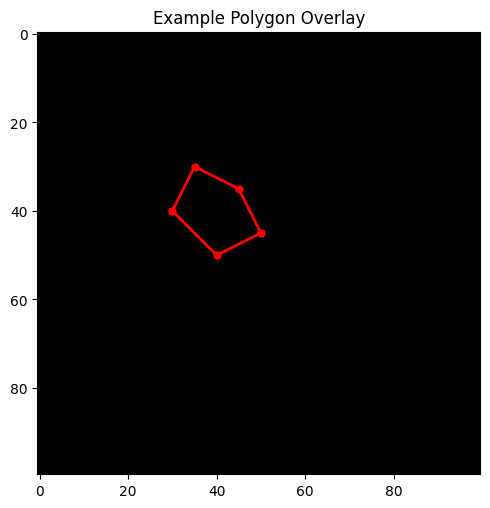

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow

# Example image (grayscale) - replace this with your actual image
img = np.zeros((100, 100))  # 100x100 black image

# Example polygon (list of (x, y) coordinates)
poly = [(30, 40), (40, 50), (50, 45), (45, 35), (35, 30)]

# Convert polygon to separate x and y lists
x_coords, y_coords = zip(*poly)

# Plot the image
plt.figure(figsize=(5, 5))
imshow(img, cmap="gray")

# Plot the polygon
plt.plot(x_coords, y_coords, marker="o", linestyle="-", color="red", linewidth=2, markersize=5)

# Connect the last point back to the first to close the polygon
plt.plot([x_coords[-1], x_coords[0]], [y_coords[-1], y_coords[0]], color="red", linewidth=2)

# Show the plot
plt.title("Example Polygon Overlay")
plt.show()


## TYC66 try

In [11]:
path = r'\\store\department\gene\chien_data\Lab\Data_and_Analysis\Tsai-Ying_Chen\TYC066_EC546_TILs_48hr_20250301\48hr_record_20250301at111238'

WL = True
multi_WL = False

Green = True

def extract_image_prefix(path, channel_name):
    # Get list of all .tif files in the directory
    path_channel = path + f"\\{channel_name}"
    timelaps_path_list = glob.glob(path_channel + "\\*.tif")

    # Extract the frame ROI name from the first image in the list
    frame_roi_name = timelaps_path_list[0].split(path_channel)
    frame_roi_name = frame_roi_name[1]
    frame_roi_name = frame_roi_name.split("\\")
    frame_roi_name = frame_roi_name[1]
    
    # Extract the ROI number from the frame name
    roi_number = frame_roi_name.split('.')
    roi_number = roi_number[0]
    roi_number = roi_number.split("ROI")
    roi_number = roi_number[1]

    # Count the number of digits in the ROI number
    number_digits_rois = len(roi_number)

    # Extract the frame number (before the word 'frame')
    frame_number = frame_roi_name.split("frame")
    frame_number = frame_number[0] + "frame"
    image_prefix = frame_number

    # Print the result
    print(f"Image path of {channel_name} channel is {path_channel}")
    print(f"Image prefix of {channel_name} channel is {path_channel}\\{image_prefix}\n")

    return path_channel, image_prefix, roi_number, number_digits_rois

if WL:
    path_WL, image_prefix_WL, roi_number_WL, number_digits_rois_WL = extract_image_prefix(path, "WhiteLight")
if Green:
    path_532, image_prefix_GR, roi_number_GR, number_digits_rois_GR = extract_image_prefix(path, "532nm")

numFrames = 1

numROIs = 1


para = 1

ROIs = range(0, numROIs, 1)

frame = 0
print(ROIs)
print(frame)
while frame < numFrames: 
# for frame in frames:
    
    t = time.time()
    
    for ROI in ROIs:        
        ROI = 33

        imgName_WL = (image_prefix_WL + "%05d_ROI%01d.tif" % (frame, ROI))
        imgName_GR = (image_prefix_GR + "%05d_ROI%01d.tif" % (frame, ROI))
        
        img_WL = image.imread(path_WL+'\\'+imgName_WL)
        img_GR = image.imread(path_532+'\\'+imgName_GR)
        
        img_WL = normalize(img_WL, 1, 99.8, axis=(0, 1))
        img_GR = normalize(img_GR, 1, 99.8, axis=(0, 1))
        
        print('Segmenting ... ' + imgName_WL)
        imgHeight, imgWidth = img_WL.shape; 
        
        #creates the image called labels and polys
        labels, polys = model.predict_instances(img_WL, prob_thresh = 0.15*para)

        centers = polys["points"] #[y, x]
        centers2 = centers[:,0]*imgWidth + centers[:,1]
        
        path_WL_save_img = path + '\\WhiteLight_segm_img_stardist'
        if not os.path.isdir(path_WL_save_img):
            os.mkdir(path_WL_save_img)
        print('   %d cells found.' % centers2.shape[0])
        imwrite(path_WL_save_img + "\\" + imgName_WL, labels.astype(np.uint16))

        path_WL_save_csv = path + '\\WhiteLight_segm_img_stardist_csv'
        if not os.path.isdir(path_WL_save_csv):
            os.mkdir(path_WL_save_csv)
        #saves the cell center coordinates into a csv
        np.savetxt(path_WL_save_csv +"\\" + image_prefix_WL + "%05d_ROI%01d.csv" % (frame, ROI), centers, delimiter=",")

        #segmenting GR
        #
        print('Segmenting ... ' + imgName_GR)
        imgHeight, imgWidth = img_GR.shape; 
        
        #creates the image called labels and polys
        labels, polys = model.predict_instances(img_GR, prob_thresh = 0.15*para)

        centers = polys["points"] #[y, x]
        centers2 = centers[:,0]*imgWidth + centers[:,1]
        
        path_GR_save_img = path + '\\532nm_segm_img_stardist'
        if not os.path.isdir(path_GR_save_img):
            os.mkdir(path_GR_save_img)
        print('   %d cells found.' % centers2.shape[0])
        imwrite(path_GR_save_img + "\\" + imgName_GR, labels.astype(np.uint16))

        path_GR_save_csv = path + '\\532nm_segm_img_stardist_csv'
        if not os.path.isdir(path_GR_save_csv):
            os.mkdir(path_GR_save_csv)
        #saves the cell center coordinates into a csv
        np.savetxt(path_GR_save_csv +"\\" + image_prefix_GR + "%05d_ROI%01d.csv" % (frame, ROI), centers, delimiter=",")
        
        
    elapsed = time.time() - t; print('Segmenting frame-%05d took %d seconds.' % (frame, elapsed))
        
    frame += frame_interval; 


Image path of WhiteLight channel is \\store\department\gene\chien_data\Lab\Data_and_Analysis\Tsai-Ying_Chen\TYC066_EC546_TILs_48hr_20250301\48hr_record_20250301at111238\WhiteLight
Image prefix of WhiteLight channel is \\store\department\gene\chien_data\Lab\Data_and_Analysis\Tsai-Ying_Chen\TYC066_EC546_TILs_48hr_20250301\48hr_record_20250301at111238\WhiteLight\48hr_record_WL_1ms_WhiteLight_frame

Image path of 532nm channel is \\store\department\gene\chien_data\Lab\Data_and_Analysis\Tsai-Ying_Chen\TYC066_EC546_TILs_48hr_20250301\48hr_record_20250301at111238\532nm
Image prefix of 532nm channel is \\store\department\gene\chien_data\Lab\Data_and_Analysis\Tsai-Ying_Chen\TYC066_EC546_TILs_48hr_20250301\48hr_record_20250301at111238\532nm\48hr_record_60G_2500ms_frame

range(0, 1)
0
Segmenting ... 48hr_record_WL_1ms_WhiteLight_frame00000_ROI33.tif
   5417 cells found.
Segmenting ... 48hr_record_60G_2500ms_frame00000_ROI33.tif
   843 cells found.
Segmenting frame-00000 took 46 seconds.


NameError: name 'frame_interval' is not defined